X: [ 1. -1.  1. -1. -1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1.
  1.  1. -1. -1.]
res_final: [ 1. -1.  1. -1. -1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1.
  1.  1. -1. -1.]
h_actual_mean (-0.149508906442-0.864726440588j)
h_est_mean (-0.149508906442-0.864726440588j)
h_est [ 1.08895926-0.53292921j -1.46687103-2.57165784j -0.57801980+0.91598145j
  0.51007452-1.20749826j -0.30168748-0.92752834j]


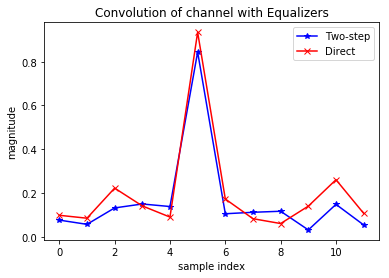

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.signal
%matplotlib inline

len_chan = 5 # length of channel
len_equ = 8  # length of equalizer
N = 22  # length of training sequence
noise_pwr = .01  # AWGN variance
floor_val = np.floor((len_chan + len_equ) / 2.0)

H = np.random.randn(len_chan) + 1j * np.random.randn(len_chan)    #channel co-effecient

X = np.random.randn(N)      #training sequence
X[X < 0] = -1               #BPSK
X[X >= 0] = 1

Y = np.convolve(H, X) #+ np.sqrt(noise_pwr) * np.random.randn(len_chan + N - 1)      #Channel model

# estimate the channel
b = Y[len_chan - 1:]                #size reshape of vector Y
col = X[len_chan - 1:]               #size reshape of vector X
if b.size > col.size:
    col = np.hstack((col, np.zeros(b.size - col.size)))   #padding to make same size of b and col
row = np.flipud(X[0:len_chan])
toep_training = la.toeplitz(col, row)
h_est, _, _, _ = np.linalg.lstsq(toep_training, b,rcond=-1)

# find an equalizer
col = np.hstack((h_est, np.zeros(len_equ - 1)))
row = np.hstack((h_est[0], np.zeros(len_equ - 1)))
toep_h_est = la.toeplitz(col, row)
b = np.zeros(h_est.size + len_equ - 1)                      #b made array of zeros
b[int(floor_val) - 1] = 1.0                                 #one of  the values made=1 to make delta func to make the filter
filter1, _, _, _ = np.linalg.lstsq(toep_h_est, b,rcond=-1)           #filter estimate

# direct method for equalizer
row = np.flipud(Y[:int(floor_val)])
if row.size < len_equ:
    row = np.hstack((row, np.zeros(len_equ - row.size)))
elif row > len_equ:
    row = row[:len_equ]
b = X
col = Y[int(floor_val) - 1:]
if col.size < X.size:
    col = np.hstack((col, np.zeros(N - col.size)))
elif col.size > X.size:
    col = col[:N]
toep_recieved = la.toeplitz(col, row)
filter2, _, _, _ = np.linalg.lstsq(toep_recieved, b,rcond=-1)

# convolve with original channel to see how our equalizers are
res1 = np.convolve(H, filter1)
res2 = np.convolve(H, filter2)

print("X:",X)
res3,_ = scipy.signal.deconvolve(Y, h_est)
res_final = np.real(res3)
print("res_final:",res_final)

    
    

# plot the results
plt.figure()
plt.plot(np.arange(H.size), np.abs(H), '-*b', label='Actual')
plt.plot(np.arange(h_est.size), np.abs(h_est), '-xr', label='Estimated')
plt.title('Channel Magnitudes')
plt.xlabel('sample index')
plt.ylabel('magnitude')
plt.legend()
plt.savefig('ls_ch_est_1.png')

plt.clf()
plt.plot(np.arange(filter1.size), np.abs(filter1), '-*b', label='Two-step')
plt.plot(np.arange(filter2.size), np.abs(filter2), '-xr', label='Direct')
plt.title('Equalizer Magnitudes')
plt.xlabel('sample index')
plt.ylabel('magnitude')
plt.legend()
plt.savefig('ls_ch_est_2.png')

plt.clf()
plt.plot(np.arange(res1.size), np.abs(res1), '-*b', label='Two-step')
plt.plot(np.arange(res2.size), np.abs(res2), '-xr', label='Direct')
plt.title('Convolution of channel with Equalizers')
plt.xlabel('sample index')
plt.ylabel('magnitude')
plt.legend()
plt.savefig('ls_ch_est_3.png')


print("h_actual_mean", np.mean(H))
print("h_est_mean", np.mean(h_est))
print("h_est",h_est)

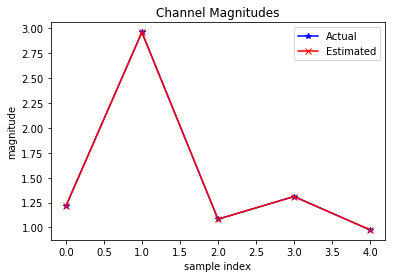

In [4]:
plt.figure()
plt.plot(np.arange(H.size), np.abs(H), '-*b', label='Actual')
plt.plot(np.arange(h_est.size), np.abs(h_est), '-xr', label='Estimated')
plt.title('Channel Magnitudes')
plt.xlabel('sample index')
plt.ylabel('magnitude')
plt.legend()
plt.savefig('ls_ch_est_1.png')


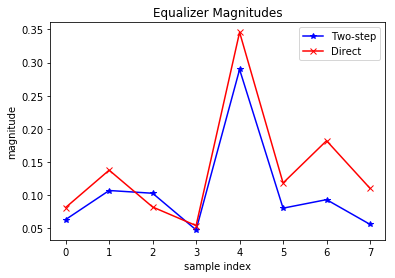

In [5]:
plt.clf()
plt.plot(np.arange(filter1.size), np.abs(filter1), '-*b', label='Two-step')
plt.plot(np.arange(filter2.size), np.abs(filter2), '-xr', label='Direct')
plt.title('Equalizer Magnitudes')
plt.xlabel('sample index')
plt.ylabel('magnitude')
plt.legend()
plt.savefig('ls_ch_est_2.png')